In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from astropy.table import Table
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
from dipole import dipole_map, dipole

#### functions

In [3]:
def flatten_map(sf_map):
    newarr = np.array([row[0] for row in sf_map])
    return np.reshape(newarr, (newarr.size,))

#### parameters

In [4]:
mapdir = '/scratch/aew492/quasars/maps'
NSIDE = 64
G = 20.5

### with dipole: $\phi$ slice

In [5]:
minphi, maxphi = 0, np.pi/8

In [6]:
sf_fn = f'selection_function_NSIDE{NSIDE}_G{G}_dipole_phi-{minphi:.2f}-{maxphi:.2f}'
sf_dip_tab = Table.read(os.path.join(mapdir, f'{sf_fn}.fits'), format='fits')
selfunc_dip = flatten_map(sf_dip_tab)

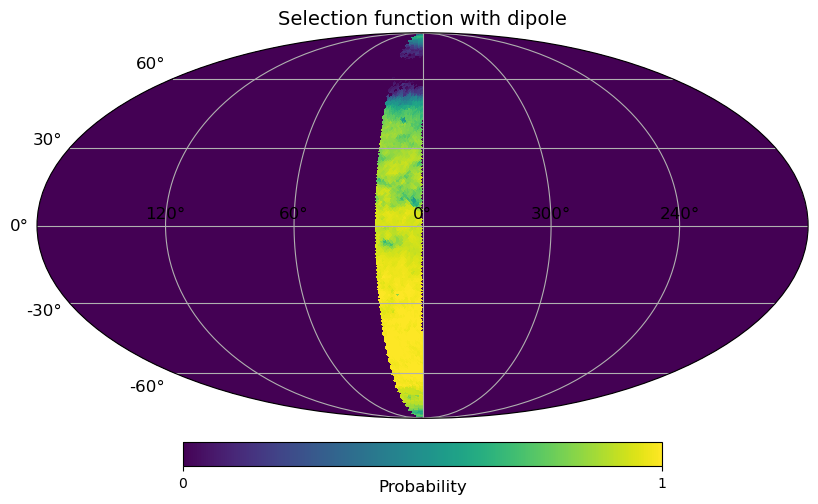

In [7]:
projview(selfunc_dip, projection_type='mollweide', title='Selection function with dipole',
         graticule=True, graticule_labels=True, unit='Probability')

### without dipole

In [8]:
sf_fn = f'selection_function_NSIDE{NSIDE}_G{G}'
sf_nodip_tab = Table.read(os.path.join(mapdir, f'{sf_fn}.fits'), format='fits')
selfunc_nodip = flatten_map(sf_nodip_tab)

In [9]:
selfunc_nodip_slice = np.copy(selfunc_nodip)
selfunc_nodip_slice[selfunc_dip==0] = 0

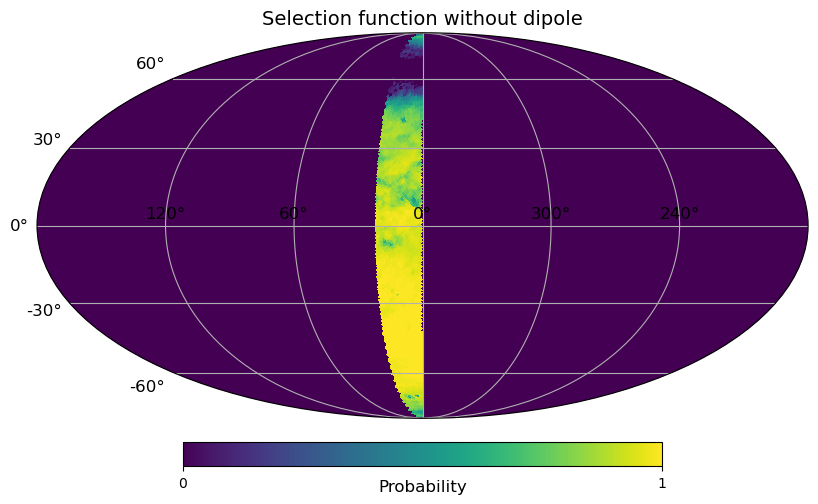

In [10]:
projview(selfunc_nodip_slice, projection_type='mollweide', title='Selection function without dipole',
         graticule=True, graticule_labels=True, unit='Probability')

### residuals (are there stripes...?)

In [11]:
res = selfunc_dip / selfunc_nodip_slice

/state/partition1/job-34843907/ipykernel_1627168/3757654388.py:1: RuntimeWarning: invalid value encountered in divide
  res = selfunc_dip / selfunc_nodip_slice


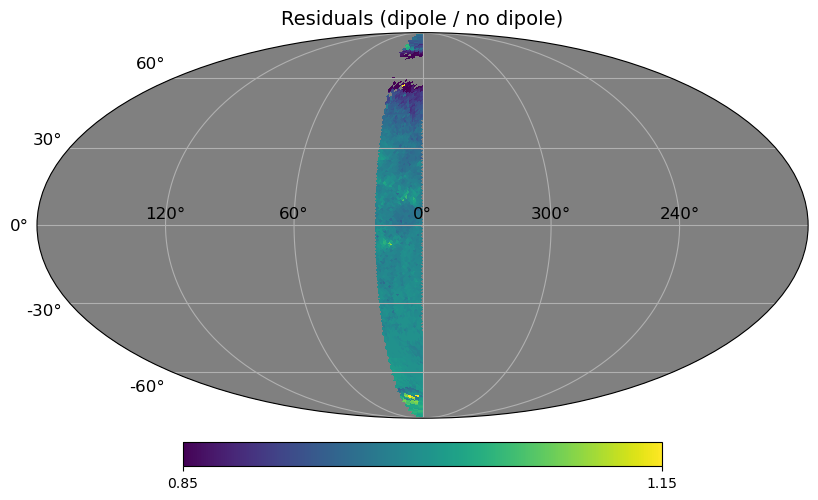

In [31]:
projview(res, projection_type='mollweide', title='Residuals (dipole / no dipole)',
         graticule=True, graticule_labels=True, min=0.85, max=1.15)

In [20]:
# compare to earlier version
old_sf_dip = flatten_map(Table.read(os.path.join(mapdir,
                                                 f'selection_function_NSIDE{NSIDE}_G{G}_dipole.fits'), format='fits'))

In [21]:
old_sf_dip_slice = np.copy(old_sf_dip)
old_sf_dip_slice[selfunc_dip==0] = 0

In [22]:
old_res = old_sf_dip_slice / selfunc_nodip_slice

/state/partition1/job-34843907/ipykernel_1627168/2514890614.py:1: RuntimeWarning: invalid value encountered in divide
  old_res = old_sf_dip_slice / selfunc_nodip_slice


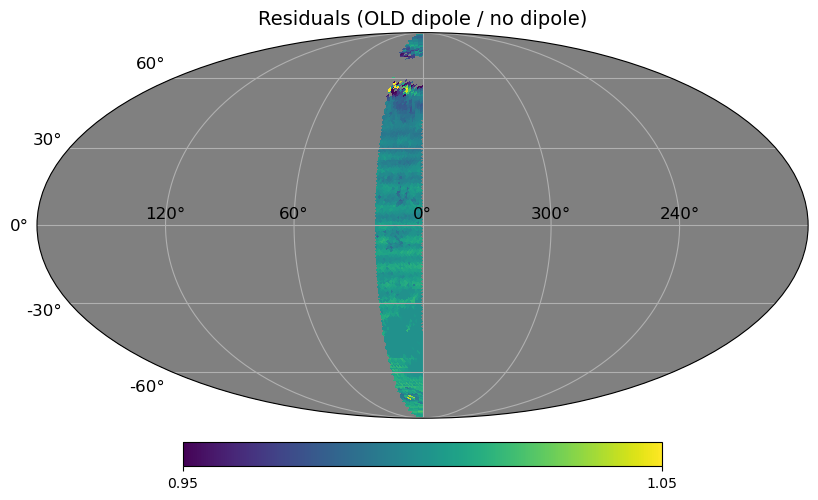

In [32]:
projview(old_res, projection_type='mollweide', title='Residuals (OLD dipole / no dipole)',
         graticule=True, graticule_labels=True, min=0.95, max=1.05)